#Classify whether application accepted or not using Logistic regression

In [11]:
"""
Created on 31 July 2020
@author: Shilpa Chavan
Algorithm : Logistic Regression
Dataset : creditcard.csv
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# Importing Dataset

In [12]:
credit = pd.read_csv("D:\\Shilpa\\Datascience\\Assignments\\logistic Regression\\creditcard.csv")


# Step1 : Data Exploration

In [13]:
credit.head(10)

,Unnamed: 0,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,2,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,3,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,4,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,5,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5
5,6,yes,0,23.25000,2.5000,0.044438,91.996670,no,no,0,54,1,1
6,7,yes,0,27.91667,3.9600,0.012576,40.833330,no,no,2,7,1,5
7,8,yes,0,29.16667,2.3700,0.076434,150.790000,yes,no,0,77,1,3
8,9,yes,0,37.00000,3.8000,0.245628,777.821700,yes,no,0,97,1,6
9,10,yes,0,28.41667,3.2000,0.019780,52.580000,no,no,0,65,1,18


In [14]:
#Checking for null values in dataset
credit.isnull().sum()

Unnamed: 0     0
card           0
reports        0
age            0
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
dtype: int64

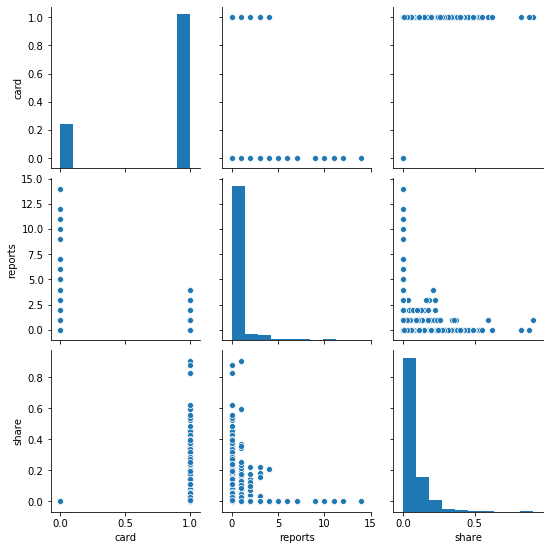

In [36]:
sns.pairplot(credit)

In [15]:
credit.drop(labels='Unnamed: 0', axis=1,inplace=True)
credit.columns

Index(['card', 'reports', 'age', 'income', 'share', 'expenditure', 'owner',
       'selfemp', 'dependents', 'months', 'majorcards', 'active'],
      dtype='object')

In [16]:
credit['card']=credit['card'].map({'yes':1,'no':0})


In [17]:
credit

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1314,1,0,33.58333,4.5660,0.002146,7.333333,yes,no,0,94,1,19
1315,0,5,23.91667,3.1920,0.000376,0.000000,no,no,3,12,1,5
1316,1,0,40.58333,4.6000,0.026513,101.298300,yes,no,2,1,1,2
1317,1,0,32.83333,3.7000,0.008999,26.996670,no,yes,0,60,1,7


In [18]:
credit.drop(labels=['age','income','expenditure','owner','selfemp','dependents','months','majorcards','active'], axis=1,inplace=True)

In [19]:
##Splitting the data into training and test data set

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
X_train, X_test, y_train, y_test = train_test_split(
    credit.drop(labels='card', axis=1),  # predictors
    credit['card'],  # target
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape
X_train
#X_test

,reports,share
1281,0,0.000120
733,0,0.077955
1215,0,0.049852
175,0,0.048544
548,0,0.044908
...,...,...
763,0,0.020562
835,0,0.017109
1216,0,0.086624
559,0,0.540995


In [20]:
# standardisation: with the StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler
# set up the scaler
scaler = StandardScaler()
# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Performing logistic Regression with reports and share cloumns

In [21]:
def run_logistic(X_train, X_test, y_train, y_test):

    # function to train and test the performance of logistic regression
    logit = LogisticRegression(random_state=44, C=0.01)
    logit.fit(X_train, y_train)

    print('Train set')
    pred = logit.predict_proba(X_train)
    print(
        'Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

    print('Test set')
    pred = logit.predict_proba(X_test)
    print(
        'Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

In [22]:
run_logistic(X_train_scaled, X_test_scaled, y_train, y_test)

Train set
Logistic Regression roc-auc: 0.9700555445348146
Test set
Logistic Regression roc-auc: 0.9622772239116211


In [56]:
#Model Building with 'card', 'reports', 'age', 'income', 'share','active' columns

In [23]:
credit1 = pd.read_csv("D:\\Shilpa\\Datascience\\Assignments\\logistic Regression\\creditcard.csv")
credit1.drop(labels='Unnamed: 0', axis=1,inplace=True)

In [24]:
credit1['card']=credit1['card'].map({'yes':1,'no':0})

In [25]:
credit1['owner']=credit1['owner'].map({'yes':1,'no':0})

In [26]:
credit1['selfemp']=credit1['selfemp'].map({'yes':1,'no':0})

In [27]:
credit1

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1314,1,0,33.58333,4.5660,0.002146,7.333333,1,0,0,94,1,19
1315,0,5,23.91667,3.1920,0.000376,0.000000,0,0,3,12,1,5
1316,1,0,40.58333,4.6000,0.026513,101.298300,1,0,2,1,1,2
1317,1,0,32.83333,3.7000,0.008999,26.996670,0,1,0,60,1,7


In [28]:
credit1.columns

Index(['card', 'reports', 'age', 'income', 'share', 'expenditure', 'owner',
       'selfemp', 'dependents', 'months', 'majorcards', 'active'],
      dtype='object')

In [29]:
credit1.drop(labels=['expenditure','owner','selfemp','dependents','months','majorcards'], axis=1,inplace=True)

In [30]:
credit1

,card,reports,age,income,share,active
0,1,0,37.66667,4.5200,0.033270,12
1,1,0,33.25000,2.4200,0.005217,13
2,1,0,33.66667,4.5000,0.004156,5
3,1,0,30.50000,2.5400,0.065214,7
4,1,0,32.16667,9.7867,0.067051,5
...,...,...,...,...,...,...
1314,1,0,33.58333,4.5660,0.002146,19
1315,0,5,23.91667,3.1920,0.000376,5
1316,1,0,40.58333,4.6000,0.026513,2
1317,1,0,32.83333,3.7000,0.008999,7


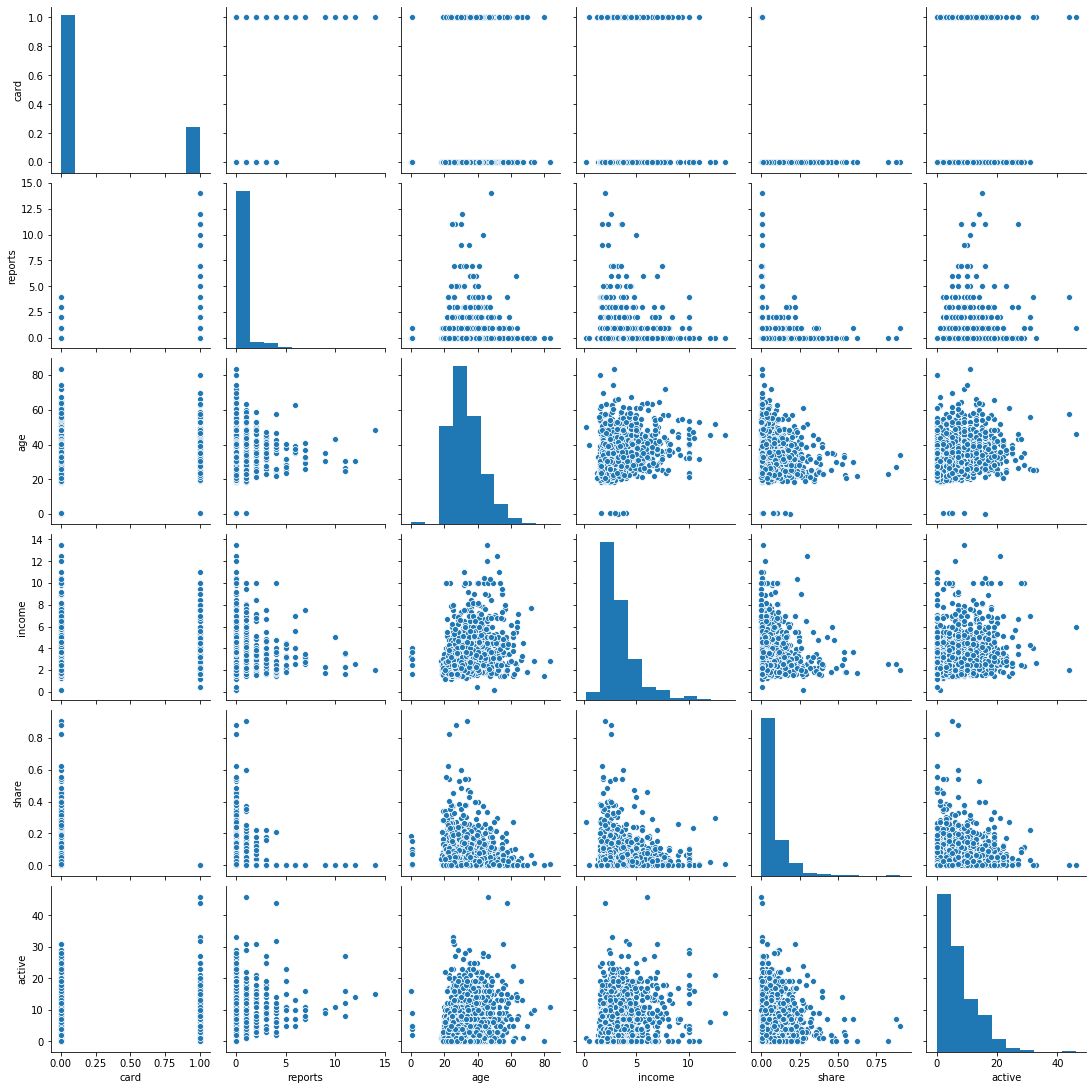

In [37]:
sns.pairplot(credit1)

In [38]:
# Correlation values between each independent features
credit1.corr()

,card,reports,age,income,share,active
card,1.000000,0.452577,-0.000537,-0.094308,-0.388028,-0.080464
reports,0.452577,1.000000,0.044089,0.011023,-0.159011,0.207755
age,-0.000537,0.044089,1.000000,0.324653,-0.115697,0.181070
income,-0.094308,0.011023,0.324653,1.000000,-0.054429,0.180540
share,-0.388028,-0.159011,-0.115697,-0.054429,1.000000,-0.023474
active,-0.080464,0.207755,0.181070,0.180540,-0.023474,1.000000


In [31]:
#some of the encoder can not able to create realtion ship with categorical type target , so here using custom fuction to make  
#the target as integer 
#target is labeled as integer then no need to do this transformation 


def find_category_mappings(df, variable):
    return {k: i for i, k in enumerate(df[variable].unique(), 0)}

def integer_encode(data,  variable, ordinal_mapping):

    data[variable] = data[variable].map(ordinal_mapping)

In [32]:
for variable in ['card']:
    mappings = find_category_mappings(credit1, variable)
    integer_encode(credit1, variable, mappings)

In [33]:
# Let's divide into train and test set

X_train, X_test, y_train, y_test = train_test_split(
    credit1.drop(labels='card', axis=1),  # predictors
    credit1['card'],  # target
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((923, 5), (396, 5))

In [83]:
# the scaler - for standardisation
from sklearn.preprocessing import StandardScaler
# standardisation: with the StandardScaler from sklearn
# set up the scaler
scaler = StandardScaler()
# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train

,reports,age,income,share,active
1281,0,21.08333,9.9999,0.000120,0
733,0,21.50000,5.5000,0.077955,0
1215,0,22.08333,1.6500,0.049852,3
175,0,28.41667,2.6000,0.048544,6
548,0,33.66667,2.1000,0.044908,0
...,...,...,...,...,...
763,0,35.50000,7.5000,0.020562,12
835,0,23.00000,3.2000,0.017109,0
1216,0,34.16667,9.2000,0.086624,7
559,0,34.25000,3.0000,0.540995,3


In [34]:
def run_logistic(X_train, X_test, y_train, y_test):

    # function to train and test the performance of logistic regression
    logit = LogisticRegression(random_state=44, C=0.01)
    logit.fit(X_train, y_train)

    print('Train set')
    pred = logit.predict_proba(X_train)
    print(
        'Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

    print('Test set')
    pred = logit.predict_proba(X_test)
    print(
        'Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

In [35]:
run_logistic(X_train_scaled, X_test_scaled, y_train, y_test)

Train set
Logistic Regression roc-auc: 0.9700555445348145
Test set
Logistic Regression roc-auc: 0.9622772239116208
